# Predicting heart disese using Machine Learning

This notebook looks into using various Python-bases ML and data science libraries in an attempt to buuild a ML model caable of prediction whether or not someone has heart disese based on their medical attributes.

We're going to take teh following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination

> Given a clinical parameters about the patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the cleaveland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it availaible on Kaggle. 
https://www.kaggle.com/ronitf/heart-disease-uci


## 3.  Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disese during the proof of concept, we'll pursue the project

## 4. Features

This is where we will get different information about each of the features in your data.

**Create data dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Preparing the tools 

We're going to use pandas,matplotlib and NumPy for data analysis and manipulation

In [1]:
# Importing all the tools we need

# Regular EDA and plotting tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models form Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape  

(303, 14)

## Data Exploration 

The goal here is to find more about the data and become subject matter expert on the data we are working with.

1. What question(s) we are trying to solve?
2. What kind of data do we have and how do we treat differnt types ?
3. What's missing from the data and how do you deal with it ?
4. Where are the outliers and why should we care about them ?
5. How can you add, change or remove features to get more out of your data  ?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

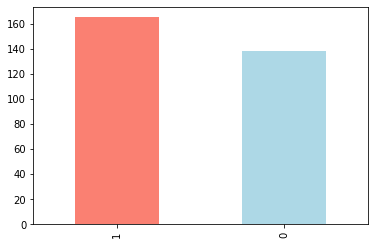

In [6]:
# lets visualize more
df.target.value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency acc to sex

In [11]:
df.sex.value_counts() # 1=male, 0=female

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column to sex column

In [13]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


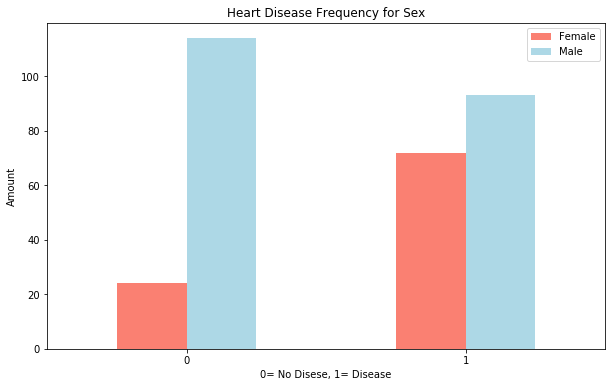

In [14]:
# lest visualize more
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color = ["salmon","lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= No Disese, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])

plt.xticks(rotation=0);

In [15]:
# Age vs max heart rate 
df.thalach.value_counts() # thalach=maximum heartrate achieved

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

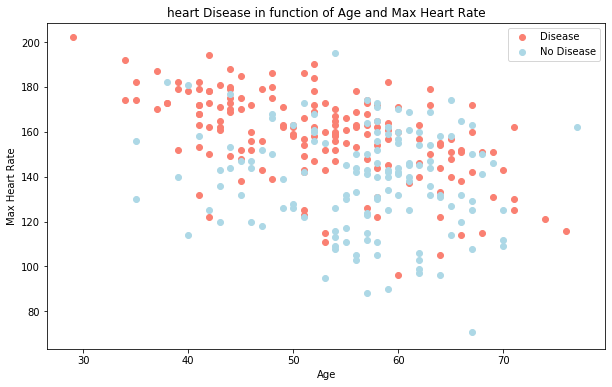

In [16]:
# Craete another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c ="salmon")

#Sca tter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c = "lightblue")

# Add some helpful info
plt.title("heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);



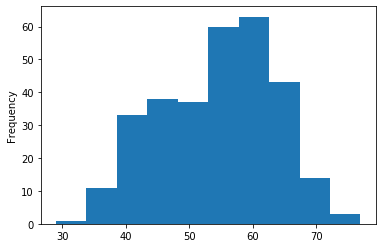

In [32]:
# Checking the age distribution
df.age.plot.hist()
# to ans about Outliers histogram is one of the best ways 
# As from below graph no age considerations ffor age with 5,10,20
# As from below graph no age considerations ffor age with 90,100,150




## Heart Diease Frequency per chest pain Type



In [35]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


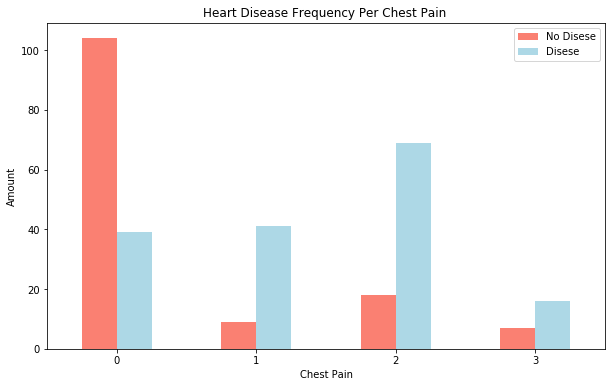

In [38]:
# making cross tab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon", "lightblue"])

# Add some information
plt.title("Heart Disease Frequency Per Chest Pain ")
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.legend(["No Disese", "Disese"])
plt.xticks(rotation=0);

In [39]:
# Make a corealation matrix(how independent column interarct with each other)
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


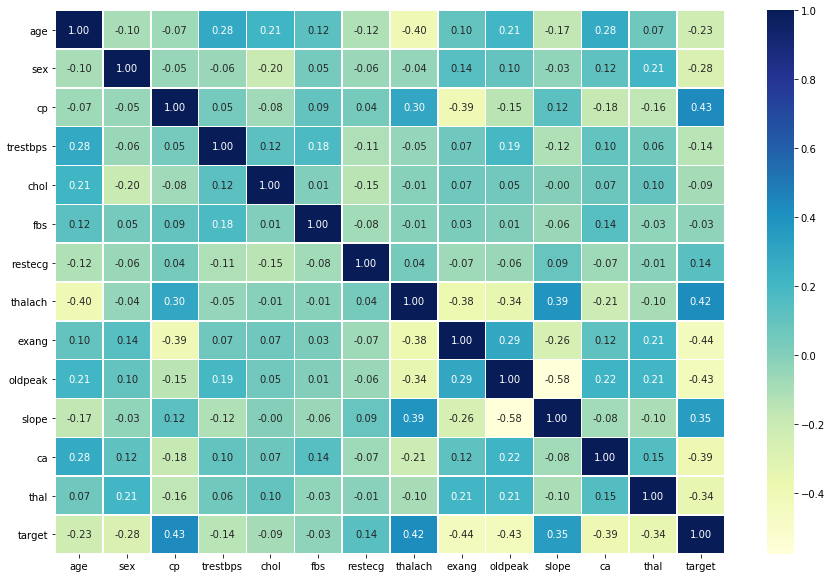

In [21]:
# let's make corrrealtion matrix more prettier
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f", #format upto 2 decimal places
                cmap = "YlGnBu"); # color

# Positive Correllation=a relationship between two variables in which one variable increases as the other also increases
# (Directly proportional)
# Negative Correllation=a relationship between two variables in which one variable increases as the other decreases(inversely
# proportional)

## 5. Modelling

In [22]:
# Create X and y
X = df.drop("target", axis=1)
y= df["target"]

# Split fata into train and ttest
np.random.seed(42)

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

Now we have split our data into training and test sets, it's time build ML model

We'll train it on (find the patterns) on the training data

And we'll test it (use the patterns) on the test set

We are going to try three different models:
    1. Logistic REgression
    2. K-Nearest Neighbours Classifier
    3. Random Forest Clasifier

In [23]:
# Put models into Dictionary
models = {"Logisic Regression": LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
            "RandomForestClassifier": RandomForestClassifier()}

# Create a function to  fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test ):
    """
    Fits and evaluates given ML models
    models : a dict of diff Scikit-Learn ML models
    X_train : training data (no labels)
    X_test : test data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # set random seed
    np.random.seed(42)
    # dict to keep model scores
    model_scores ={}
    # Loop through models
    for name, model in models.items():
        # Fir the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
        

In [24]:
model_scores = fit_and_score(models =models,
                            X_train=X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test
                            )
model_scores

E:\UDemy\ML\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logisic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

## Baseline Model Comparison

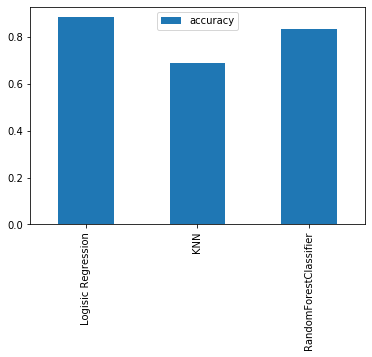

In [27]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Now We have got the baeline model... and we know thata model first predictions are'nt always we should based our next steps off.
LEts look at te following

* Hyperparameters
* Feature Importance
* Confusion MAtrix
* Cross Validation
* Precision
* REcall
* F1 Score
* Classification Report
* ROC Curve
* Area under The curve (AUC)

### HYperparameter Tuning


In [59]:
# Lets tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Set up KNN Instsnce
knn =KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors =i)
    # Fit the algo
    knn.fit(X_train, y_train)
    
    # Upadte training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test,y_test))


In [60]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [61]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score o the test data: 75.41%


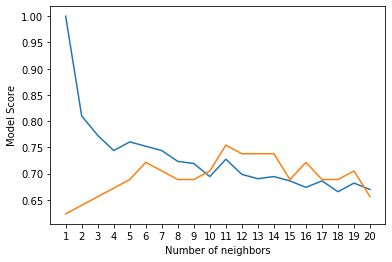

In [63]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")

print(f"Maximum KNN score o the test data: {max(test_scores)* 100:.2f}%")


#### Since even after hyperpatrameter tuning KNN score is below Random forest and Logistic regression we are going to discard further experimentation with KNN

## Hyperparameter tuning Randomaized search CV


We are going to tune:

* Logistic Regression()
* RandomSearchClassifier()

 ... using Randomized Search CV

In [29]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4, 4,20),
                "solver" : ["liblinear"]
               }

# Craete a hyperparameter grid fro RandomForestClassifier
rf_grid ={"n_estimators": np.arange(10,1000,50),
         "max_depth" : [None, 3 , 5, 10],
         "min_samples_split": np.arange(2,20,2),
        "min_samples_leaf" : np.arange(1,20,2)}

In [30]:
# Tuen Logirithmic regression
np.random.seed(42)

#Set up random hyperparameter search for LogitsicREgression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv= 5,
                               n_iter = 20,
                               verbose =True)

#Fir random hyperparameter search mmmodel for LogisticREgression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

### Now ww've tuned Logistic Regression , let's do the same for RandomForestClassifier() 

In [34]:
# setup random seed
np.random.seed(42)

# Set up random hyperparameter search for Random forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv =5,
                          verbose=True)

# Fit the random hyperparameter search model for RandomForest Classifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [35]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [36]:
# Evalute the the Randomized sarch RandomForestClassifier Model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [37]:
model_scores


{'Logisic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

## Hyperparameter Tuning using Grid SearchCV

> Since our logistic Regression model provides teh best scores sos far, we will try to improve them again using GridSearchCV...

In [39]:
# Different hyperparameters for of LogisticRegressionModel
log_reg_grid = {
    "C": np.logspace(-4, 4 , 30),
    "solver" : ["liblinear"]
}

# Set up grid hyperparameter search for LogisticRegression

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    5.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [40]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [41]:
# Evalutes grid search Logistic Regression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluation Machine learnng Classifier

* ROC curve Aand AUC Curve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score


To make comapriosns and evalute our trained models, first we need to make predictions.


In [44]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

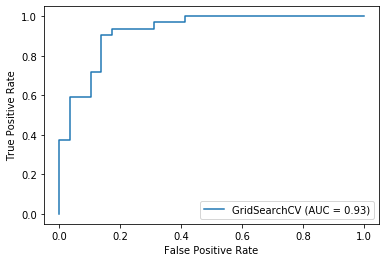

In [45]:
 # Plot ROC curve and will calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [46]:
# Confusion Matric
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


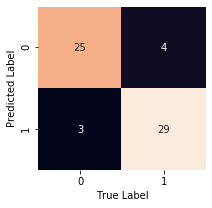

In [49]:
# Lest visualize Confusion MAtrix

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax= sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_preds)

Let's get a classification report as well as cross validated precison, recall and f1-score



In [52]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation matrix using cross validation 

Now we are going to claculate precison, recall and f1-score of our model using cross validation and to do so we'll be using cross_val_score().

In [53]:
# Check best hyprparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
#  Will create a classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")


In [56]:
# Cross-validated Accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [57]:
cv_acc= np.mean(cv_acc)
cv_acc

0.8446994535519124

In [59]:
# Cross-validated Precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [61]:
cv_precision=np.mean(cv_precision)
cv_precision


0.8207936507936507

In [62]:
# Cross-validated Recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [64]:
# Cross-validated F1-score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

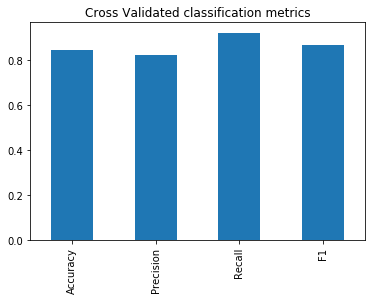

In [67]:
# Visualize our Cross validated metrics

cv_metrics = pd.DataFrame({
    "Accuracy" : cv_acc,
    "Precision" : cv_precision,
    "Recall" : cv_recall,
    "F1" : cv_f1},
    index=[0]
)

cv_metrics.T.plot.bar(title = "Cross Validated classification metrics", legend=False);